In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset1.csv')

In [3]:
df.head()

,Road1,Road2,Road3,Road4
0,1.0,6.0,11.0,17.0
1,12.0,15.0,17.0,9.0
2,22.0,13.0,14.0,11.0
3,23.0,10.0,15.0,14.0
4,17.0,15.0,6.0,17.0


In [4]:
df.tail()

,Road1,Road2,Road3,Road4
167,10.0,18.0,14.0,18.0
168,12.0,19.0,13.0,15.0
169,16.0,20.0,15.0,10.0
170,14.0,13.0,13.0,15.0
171,18.0,12.0,19.0,12.0


In [5]:
df.shape

(172, 4)

In [6]:
df.columns

Index(['Road1', 'Road2', 'Road3', 'Road4'], dtype='object')

In [7]:
# Calculate traffic flow rate for each road
green_light_duration = 10  # in seconds
traffic_flow_rates = {}

for column in df.columns:
    road_name = column
    flow_rate = df[column].sum() / (len(df) * green_light_duration)
    traffic_flow_rates[road_name] = flow_rate

# Calculate overall intersection flow rate
total_cars_exited = df.sum().sum()
intersection_flow_rate = total_cars_exited / (len(df) * len(df.columns) * green_light_duration)

# Print traffic flow rates
print("Traffic Flow Rates:")
for road, flow_rate in traffic_flow_rates.items():
    print(f"{road}: {flow_rate}")
print(f"Intersection Flow Rate: {intersection_flow_rate}")

Traffic Flow Rates:
Road1: 1.491860465116279
Road2: 1.4412790697674418
Road3: 1.5
Road4: 1.5220930232558139
Intersection Flow Rate: 1.4888081395348838


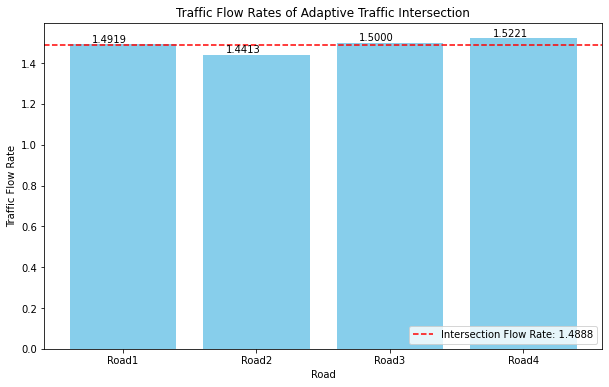

In [8]:
# Plot traffic flow rates
plt.figure(figsize=(10, 6))
bars = plt.bar(traffic_flow_rates.keys(), traffic_flow_rates.values(), color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.axhline(y=intersection_flow_rate, color='r', linestyle='--', label=f'Intersection Flow Rate: {intersection_flow_rate:.4f}')
plt.xlabel('Road')
plt.ylabel('Traffic Flow Rate')
plt.title('Traffic Flow Rates of Adaptive Traffic Intersection')
plt.legend(loc='lower right')
plt.show()

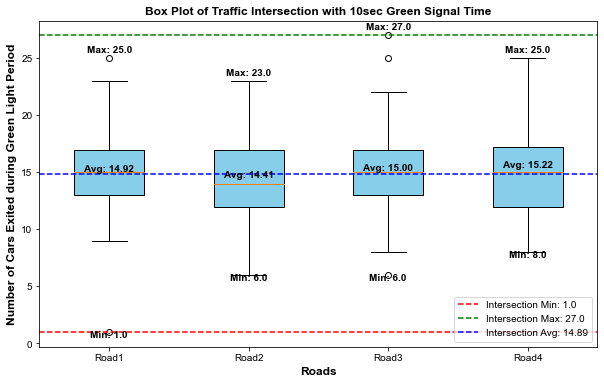

In [13]:
from matplotlib import rcParams

# Set font family and size
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 10

# Define colors for the box plot
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plot box plot with custom colors
plt.figure(figsize=(10, 6))

# Calculate min, max, and average for the intersection
intersection_min = df.min().min()
intersection_max = df.max().max()
intersection_avg = df.mean().mean()

# Plot each box individually with custom colors
for i, column in enumerate(df.columns):
    box = plt.boxplot(df[column], positions=[i], patch_artist=True, widths=0.5)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Calculate min, max, and average
    min_val = df[column].min()
    max_val = df[column].max()
    avg_val = df[column].mean()

    # Add annotations
    plt.text(i, min_val - 0.5, f'Min: {min_val}', horizontalalignment='center', fontsize=10, fontweight='bold')
    plt.text(i, max_val + 0.5, f'Max: {max_val}', horizontalalignment='center', fontsize=10, fontweight='bold')
    plt.text(i, avg_val, f'Avg: {avg_val:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, fontweight='bold')

# Plot intersection statistics lines
plt.axhline(y=intersection_min, color='r', linestyle='--', label=f'Intersection Min: {intersection_min}')
plt.axhline(y=intersection_max, color='g', linestyle='--', label=f'Intersection Max: {intersection_max}')
plt.axhline(y=intersection_avg, color='b', linestyle='--', label=f'Intersection Avg: {intersection_avg:.2f}')

plt.title('Box Plot of Traffic Intersection with 10sec Green Signal Time', fontsize=12, fontweight='bold')
plt.xlabel('Roads', fontsize=12, fontweight='bold')
plt.ylabel('Number of Cars Exited during Green Light Period', fontsize=12, fontweight='bold')
plt.legend()
plt.xticks(range(len(df.columns)), df.columns)  # Set x-ticks to road names
plt.grid(False)  # Turn off grid
plt.show()

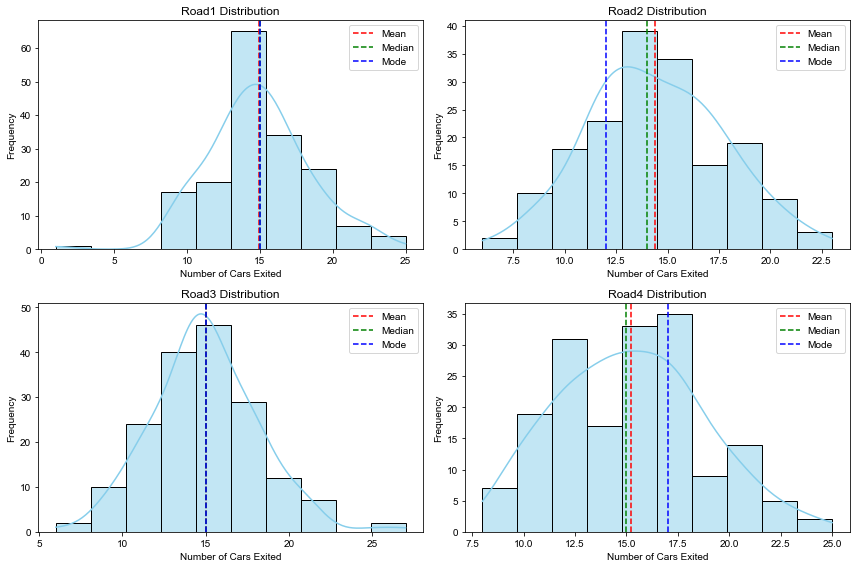

In [10]:
import scipy.stats as stats

# Create a new figure
plt.figure(figsize=(12, 8))

# Loop through each road
for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=10)  # Plot histogram
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')  # Plot mean
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')  # Plot median
    mode = stats.mode(df[col])[0][0]  # Calculate mode
    plt.axvline(mode, color='b', linestyle='--', label='Mode')  # Plot mode
    plt.title(f'{col} Distribution')
    plt.xlabel('Number of Cars Exited')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

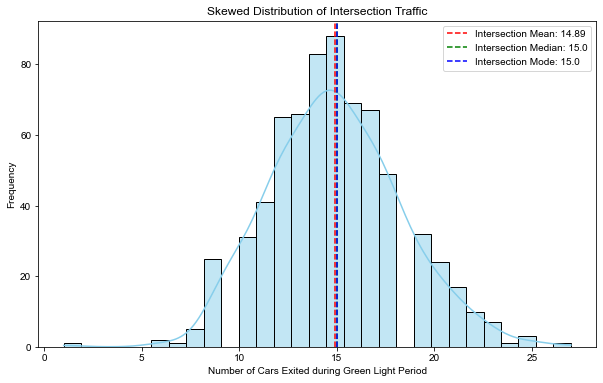

In [11]:
# Flatten the DataFrame into a single column
intersection_data = df.values.flatten()

# Calculate mean, median, and mode for the intersection
intersection_mean = intersection_data.mean()
intersection_median = np.median(intersection_data)  # Corrected
intersection_mode = pd.Series(intersection_data).mode()[0]  # mode() returns a Series, so we get the first value

# Plot skewed distribution
plt.figure(figsize=(10, 6))
sns.histplot(intersection_data, kde=True, color='skyblue')

# Plot vertical lines for mean, median, and mode
plt.axvline(x=intersection_mean, color='r', linestyle='--', label=f'Intersection Mean: {intersection_mean:.2f}')
plt.axvline(x=intersection_median, color='g', linestyle='--', label=f'Intersection Median: {intersection_median}')
plt.axvline(x=intersection_mode, color='b', linestyle='--', label=f'Intersection Mode: {intersection_mode}')

plt.title('Skewed Distribution of Intersection Traffic')
plt.xlabel('Number of Cars Exited during Green Light Period')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)

plt.show()

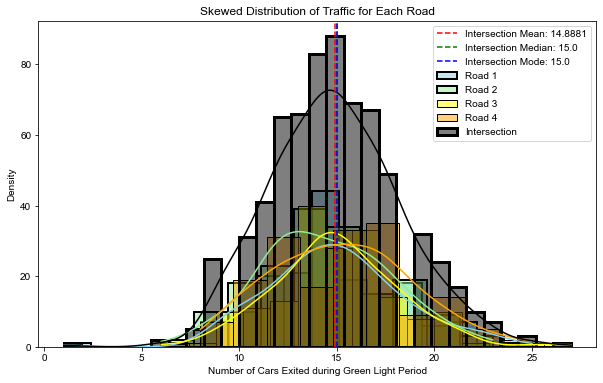

In [12]:
# Plot skewed distribution curve for each road with different colors
plt.figure(figsize=(10, 6))

road_data1 = df['Road1']
road_data2 = df['Road2']
road_data3 = df['Road3']
road_data4 = df['Road4']

sns.histplot(road_data1, kde=True, label='Road 1', alpha=0.5, color='skyblue', linewidth=2)
sns.histplot(road_data2, kde=True, label='Road 2', alpha=0.5, color='lightgreen', linewidth=2)
sns.histplot(road_data3, kde=True, label='Road 3', alpha=0.5, color='yellow', linewidth=1)
sns.histplot(road_data4, kde=True, label='Road 4', alpha=0.5, color='orange', linewidth=1)

# Plot histogram and density curve for the entire intersection
intersection_data = df.values.flatten()
sns.histplot(intersection_data, kde=True, color='black', label='Intersection', linewidth=3)

# Calculate mean, median, and mode for the intersection
intersection_mean = np.mean(intersection_data)
intersection_median = np.median(intersection_data)
intersection_mode = pd.Series(intersection_data).mode()[0]

# Plot vertical lines for mean, median, and mode of intersection
plt.axvline(x=intersection_mean, color='r', linestyle='--', label=f'Intersection Mean: {intersection_mean:.4f}')
plt.axvline(x=intersection_median, color='g', linestyle='--', label=f'Intersection Median: {intersection_median}')
plt.axvline(x=intersection_mode, color='b', linestyle='--', label=f'Intersection Mode: {intersection_mode}')

plt.title('Skewed Distribution of Traffic for Each Road')
plt.xlabel('Number of Cars Exited during Green Light Period')
plt.ylabel('Density')
plt.legend()
plt.grid(False)

plt.show()